# Training and saving the Models:
# Arima Models:
## 1. Arima on BTC (without news sentiment):

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import joblib
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


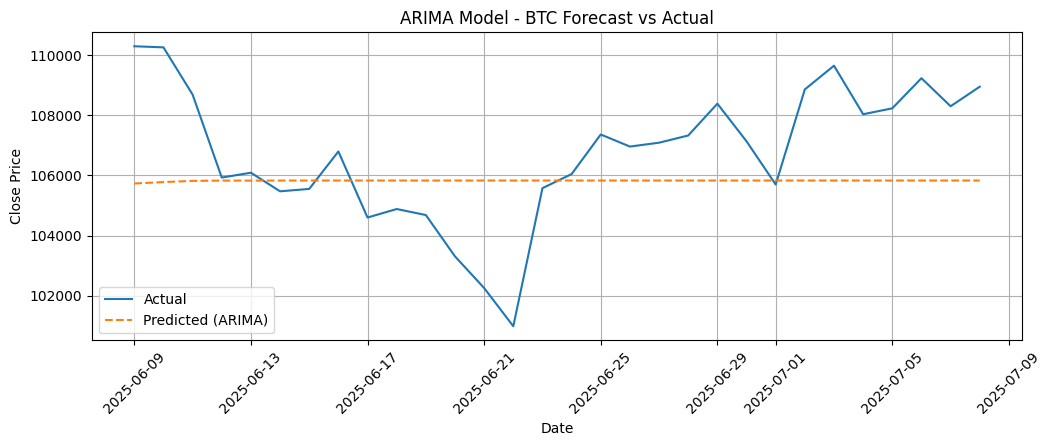

🔵 ARIMA R² Score: -0.1836
📉 RMSE: 2409.43
📉 MAE: 1948.18
📉 MAPE: 1.82%


In [14]:
# Loading the dataset
df_btc = pd.read_csv("BTC_final.csv", parse_dates=['timestamp'], index_col='timestamp')
df_btc.sort_index(inplace=True)
# Train test Split to check performance
# Target column
series = df_btc['close']

# Train-test split
train = series[:-30]
test = series[-30:]
# model training
model_arima = ARIMA(train, order=(5, 1, 0))
model_arima_fit = model_arima.fit()
# Forecast the test period
predictions = model_arima_fit.forecast(steps=30)

# Plot actual vs predicted
plt.figure(figsize=(12, 4))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted (ARIMA)', linestyle='--')
plt.title('ARIMA Model - BTC Forecast vs Actual')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2_arima = r2_score(test, predictions)
print(f"🔵 ARIMA R² Score: {r2_arima:.4f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")



### Saving the model

In [ ]:
# Save the model
joblib.dump(model_arima_fit, "btc_arima_model.pkl")
print("✅ ARIMA model saved as btc_arima_model.pkl")

✅ ARIMA model saved as btc_arima_model.pkl


## 2. Arima on BTC (with sentiment):

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


📉 RMSE: 2407.95
📉 MAE: 1946.92
📉 MAPE: 1.82%
✅ R² Score: -0.1821


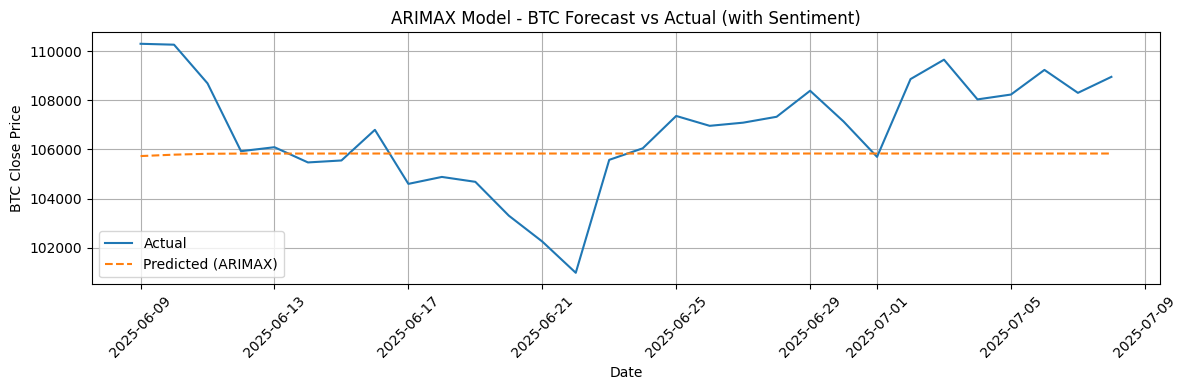

In [15]:


# Load the dataset
df = pd.read_csv("BTC_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Fill any missing sentiment values
df['sentiment'] = df['sentiment'].fillna(0)

# Define target and exogenous variables
y = df['close']
exog = df[['sentiment']]

# Train-test split (last 30 days as test set)
y_train, y_test = y[:-30], y[-30:]
exog_train, exog_test = exog[:-30], exog[-30:]

# Build and fit ARIMAX model
model = SARIMAX(y_train, exog=exog_train, order=(5, 1, 0))
model_fit = model.fit(disp=False)

# Forecast
predictions = model_fit.forecast(steps=30, exog=exog_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2 = r2_score(y_test, predictions)

# Print metrics
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted (ARIMAX)', linestyle='--')
plt.title('ARIMAX Model - BTC Forecast vs Actual (with Sentiment)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('BTC Close Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## 3. Arima on ETH (without sentiment):

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


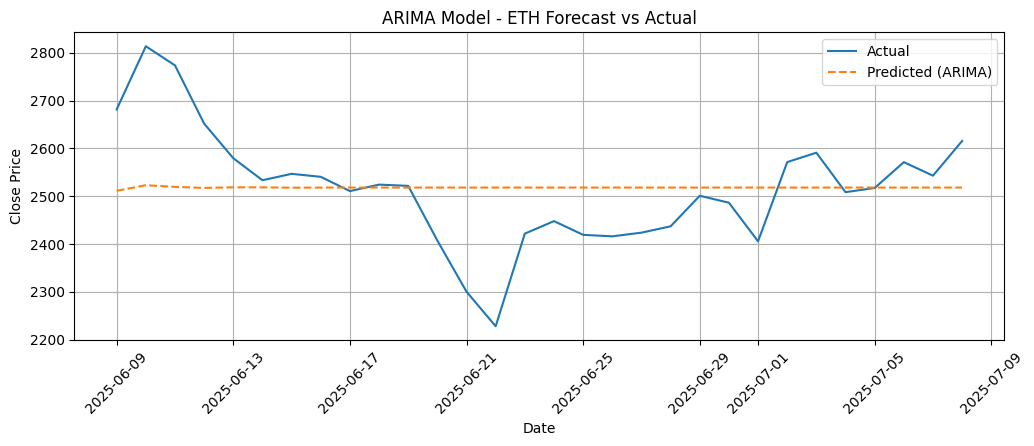

🔵 ARIMA R² Score: 0.0025
📉 RMSE: 119.71
📉 MAE: 87.58
📉 MAPE: 3.49%


In [16]:
# Loading the dataset
df_eth = pd.read_csv("ETH_final.csv", parse_dates=['timestamp'], index_col='timestamp')
df_eth.sort_index(inplace=True)
# Train test Split to check performance
# Target column
series = df_eth['close']

# Train-test split
train = series[:-30]
test = series[-30:]
# Model training
model_arima = ARIMA(train, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Forecast the test period
predictions = model_arima_fit.forecast(steps=30)

# Plot actual vs predicted
plt.figure(figsize=(12, 4))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted (ARIMA)', linestyle='--')
plt.title('ARIMA Model - ETH Forecast vs Actual')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2_arima = r2_score(test, predictions)
print(f"🔵 ARIMA R² Score: {r2_arima:.4f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")

In [ ]:
# Save the model
joblib.dump(model_arima_fit, "eth_arima_model.pkl")
print("✅ ARIMA model saved as eth_arima_model.pkl")

✅ ARIMA model saved as eth_arima_model.pkl


## 4. Arima on ETH (with sentiment):

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


📉 RMSE: 119.71
📉 MAE: 87.58
📉 MAPE: 3.49%
✅ R² Score: 0.0024


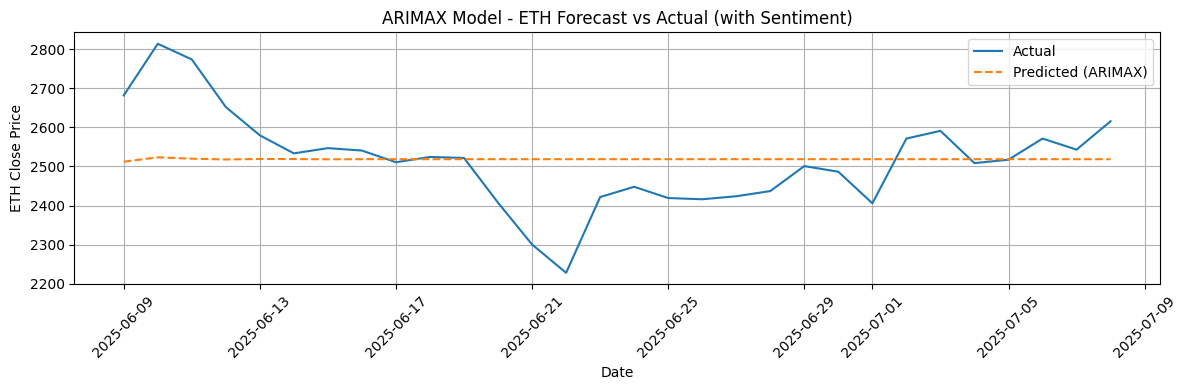

In [17]:


# Load the dataset
df = pd.read_csv("ETH_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Fill any missing sentiment values
df['sentiment'] = df['sentiment'].fillna(0)

# Define target and exogenous variables
y = df['close']
exog = df[['sentiment']]

# Train-test split (last 30 days as test set)
y_train, y_test = y[:-30], y[-30:]
exog_train, exog_test = exog[:-30], exog[-30:]

# Build and fit ARIMAX model
model = SARIMAX(y_train, exog=exog_train, order=(5, 1, 0))
model_fit = model.fit(disp=False)

# Forecast
predictions = model_fit.forecast(steps=30, exog=exog_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2 = r2_score(y_test, predictions)

# Print metrics
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted (ARIMAX)', linestyle='--')
plt.title('ARIMAX Model - ETH Forecast vs Actual (with Sentiment)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('ETH Close Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## 5. Arima on BNB (without sentiment):

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


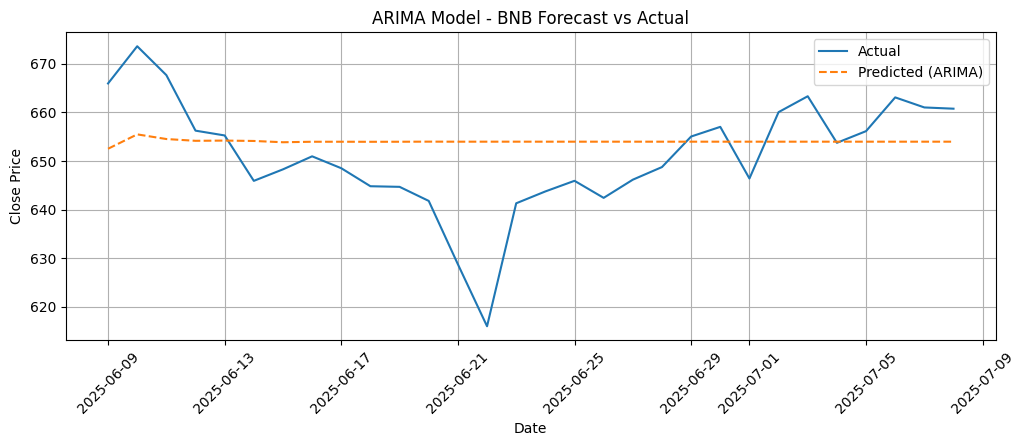

🔵 ARIMA R² Score: -0.0535
📉 RMSE: 11.76
📉 MAE: 9.07
📉 MAPE: 1.40%


In [18]:
# Loading the dataset
df_bnb = pd.read_csv("BNB_final.csv", parse_dates=['timestamp'], index_col='timestamp')
df_bnb.sort_index(inplace=True)
# Train test Split to check performance
# Target column
series = df_bnb['close']

# Train-test split
train = series[:-30]
test = series[-30:]
# model training
model_arima = ARIMA(train, order=(5, 1, 0))
model_arima_fit = model_arima.fit()
# Forecast the test period
predictions = model_arima_fit.forecast(steps=30)

# Plot actual vs predicted
plt.figure(figsize=(12, 4))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted (ARIMA)', linestyle='--')
plt.title('ARIMA Model - BNB Forecast vs Actual')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2_arima = r2_score(test, predictions)
print(f"🔵 ARIMA R² Score: {r2_arima:.4f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")

In [ ]:
# Save the model
joblib.dump(model_arima_fit, "bnb_arima_model.pkl")
print("✅ ARIMA model saved as bnb_arima_model.pkl")

✅ ARIMA model saved as bnb_arima_model.pkl


## 6. Arima on BNB (with sentiment):

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


📉 RMSE: 11.76
📉 MAE: 9.07
📉 MAPE: 1.40%
✅ R² Score: -0.0540


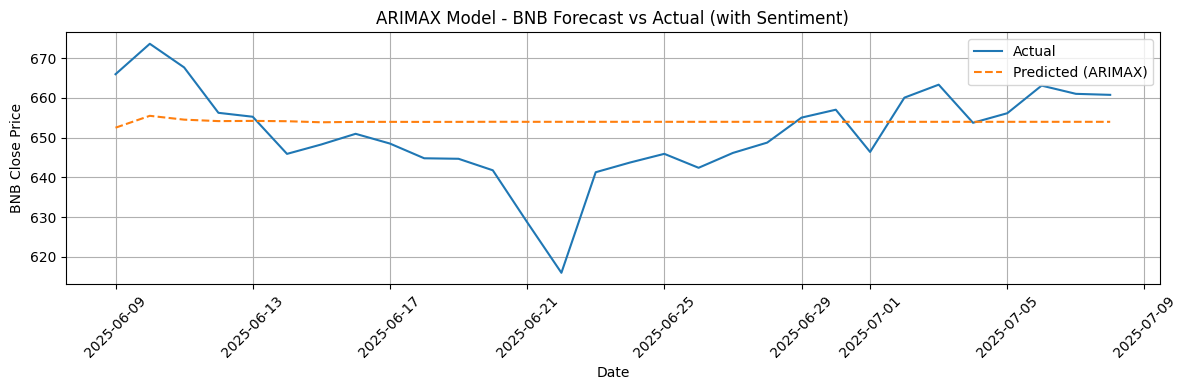

In [19]:


# Load the dataset
df = pd.read_csv("BNB_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Fill any missing sentiment values
df['sentiment'] = df['sentiment'].fillna(0)

# Define target and exogenous variables
y = df['close']
exog = df[['sentiment']]

# Train-test split (last 30 days as test set)
y_train, y_test = y[:-30], y[-30:]
exog_train, exog_test = exog[:-30], exog[-30:]

# Build and fit ARIMAX model
model = SARIMAX(y_train, exog=exog_train, order=(5, 1, 0))
model_fit = model.fit(disp=False)

# Forecast
predictions = model_fit.forecast(steps=30, exog=exog_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2 = r2_score(y_test, predictions)

# Print metrics
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted (ARIMAX)', linestyle='--')
plt.title('ARIMAX Model - BNB Forecast vs Actual (with Sentiment)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('BNB Close Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Prophet Models:

## 1. Prophet on BTC (without sentiment):

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2h40nuac/mouz86k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2h40nuac/tr6v6_1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63216', 'data', 'file=/tmp/tmp2h40nuac/mouz86k0.json', 'init=/tmp/tmp2h40nuac/tr6v6_1d.json', 'output', 'file=/tmp/tmp2h40nuac/prophet_model0bi4x745/prophet_model-20250712100239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🟣 Prophet R² Score: -47.0557
📉 RMSE: 15352.93
📉 MAE: 15205.29
📉 MAPE: 14.21%


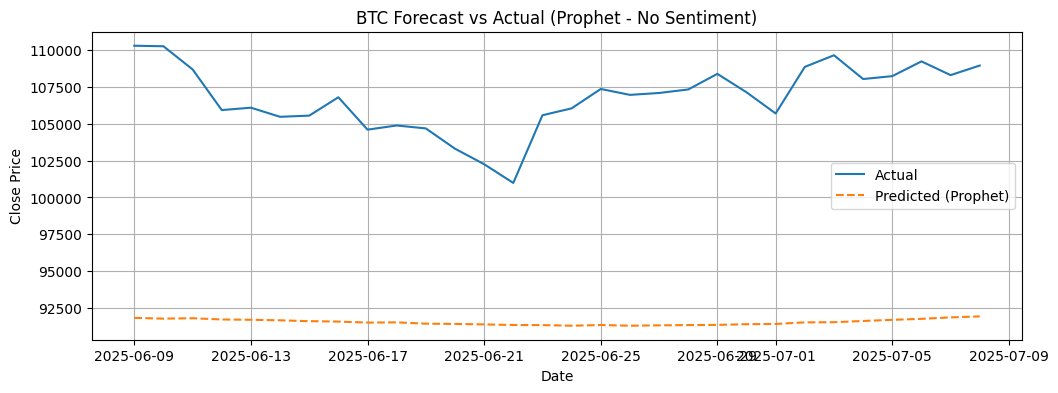

In [28]:
# Load BTC data
df_btc = pd.read_csv("BTC_final.csv", parse_dates=['timestamp'])

# Prepare for Prophet format
df_prophet = df_btc[['timestamp', 'close']].rename(columns={
    'timestamp': 'ds',
    'close': 'y'
})
train_df = df_prophet[:-30]  # All rows except last 30
test_df = df_prophet[-30:]  # Last 30 rows
# Initialize model
model = Prophet(daily_seasonality=True)

# Fit model on training data
model.fit(train_df)
# Create future dataframe (30 days ahead)
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Extract only predictions for the test period
predicted = forecast.set_index('ds').loc[test_df['ds']]
actual = test_df.set_index('ds')['y']

# Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted['yhat']))
mae = mean_absolute_error(actual, predicted['yhat'])
mape = np.mean(np.abs((actual - predicted['yhat']) / actual)) * 100

# Results
r2_prophet = r2_score(actual, predicted['yhat'])  # where actual and predicted were used in Prophet
print(f"🟣 Prophet R² Score: {r2_prophet:.4f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
plt.figure(figsize=(12, 4))
plt.plot(actual.index, actual, label='Actual')
plt.plot(actual.index, predicted['yhat'], label='Predicted (Prophet)', linestyle='--')
plt.title("BTC Forecast vs Actual (Prophet - No Sentiment)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


## 2. Prophet on BTC (using news sentiment):

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2h40nuac/1cqvdbdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2h40nuac/haocq421.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13770', 'data', 'file=/tmp/tmp2h40nuac/1cqvdbdy.json', 'init=/tmp/tmp2h40nuac/haocq421.json', 'output', 'file=/tmp/tmp2h40nuac/prophet_modelvmb8zv_e/prophet_model-20250712100258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📉 RMSE: 15554.97
📉 MAE: 15408.15
📉 MAPE: 14.40%
✅ R² Score: -48.3288


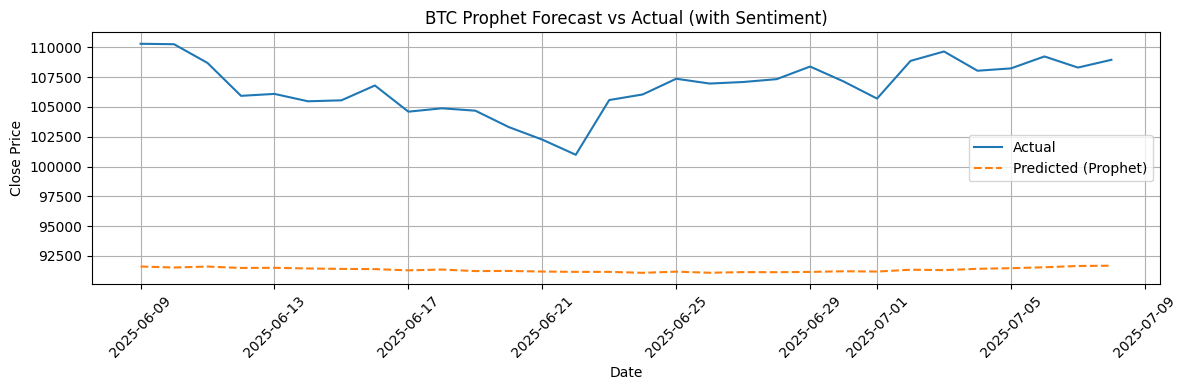

In [29]:
# Load BTC data (with sentiment already merged)
df_btc = pd.read_csv("BTC_final.csv", parse_dates=['timestamp'])

# Rename for Prophet format
df_prophet = df_btc[['timestamp', 'close', 'sentiment']].rename(columns={
    'timestamp': 'ds',
    'close': 'y'
})

# Last 30 days = test, rest = train
train_df = df_prophet[:-30]
test_df = df_prophet[-30:]

# Initialize model and add sentiment as external regressor
model = Prophet(daily_seasonality=True)
model.add_regressor('sentiment')

# Fit on training data
model.fit(train_df)

# Create future dataframe (same length as test set)
future = model.make_future_dataframe(periods=30)

# Add sentiment for both train and test periods
future['sentiment'] = pd.concat([train_df['sentiment'], test_df['sentiment']], ignore_index=True)

# Predict
forecast = model.predict(future)

# Extract prediction for test period
predicted = forecast.set_index('ds').loc[test_df['ds']]
actual = test_df.set_index('ds')['y']

# Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted['yhat']))
mae = mean_absolute_error(actual, predicted['yhat'])
mape = np.mean(np.abs((actual - predicted['yhat']) / actual)) * 100
r2 = r2_score(actual, predicted['yhat'])

# Print metrics
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(actual.index, actual, label='Actual')
plt.plot(actual.index, predicted['yhat'], label='Predicted (Prophet)', linestyle='--')
plt.title(f"BTC Prophet Forecast vs Actual (with Sentiment)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import pickle

with open("btc_prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)


## 3. Prophet on ETH (without news sentiment):

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/q7f6inhd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/7h68p8x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49509', 'data', 'file=/tmp/tmpl2c53jhc/q7f6inhd.json', 'init=/tmp/tmpl2c53jhc/7h68p8x0.json', 'output', 'file=/tmp/tmpl2c53jhc/prophet_modelfvzpbw7r/prophet_model-20250712115929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:59:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🟣 Prophet R² Score: -16.6722
📉 RMSE: 503.85
📉 MAE: 491.98
📉 MAPE: 19.79%


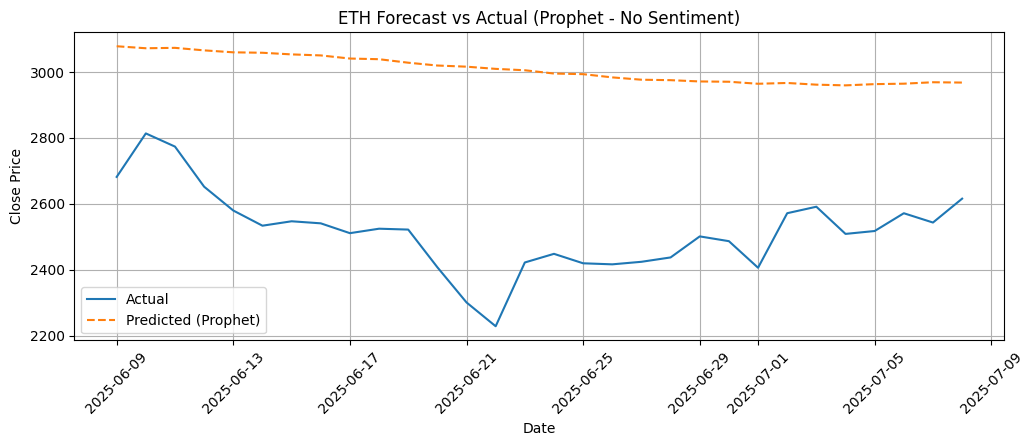

In [3]:
# Load BTC data
df_eth = pd.read_csv("ETH_final.csv", parse_dates=['timestamp'])

# Prepare for Prophet format
df_prophet = df_eth[['timestamp', 'close']].rename(columns={
    'timestamp': 'ds',
    'close': 'y'
})
train_df = df_prophet[:-30]  # All rows except last 30
test_df = df_prophet[-30:]  # Last 30 rows
# Initialize model
model = Prophet(daily_seasonality=True)

# Fit model on training data
model.fit(train_df)
# Create future dataframe (30 days ahead)
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Extract only predictions for the test period
predicted = forecast.set_index('ds').loc[test_df['ds']]
actual = test_df.set_index('ds')['y']

# Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted['yhat']))
mae = mean_absolute_error(actual, predicted['yhat'])
mape = np.mean(np.abs((actual - predicted['yhat']) / actual)) * 100

# Results
r2_prophet = r2_score(actual, predicted['yhat'])  # where actual and predicted were used in Prophet
print(f"🟣 Prophet R² Score: {r2_prophet:.4f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
plt.figure(figsize=(12, 4))
plt.plot(actual.index, actual, label='Actual')
plt.plot(actual.index, predicted['yhat'], label='Predicted (Prophet)', linestyle='--')
plt.title("ETH Forecast vs Actual (Prophet - No Sentiment)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


## 4. Prophet on ETH (with news sentiment):

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/l9xq11yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/d4bqow1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23433', 'data', 'file=/tmp/tmpl2c53jhc/l9xq11yf.json', 'init=/tmp/tmpl2c53jhc/d4bqow1r.json', 'output', 'file=/tmp/tmpl2c53jhc/prophet_modelzar69ox0/prophet_model-20250712115835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:58:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:58:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📉 RMSE: 497.56
📉 MAE: 485.35
📉 MAPE: 19.53%
✅ R² Score: -16.2335


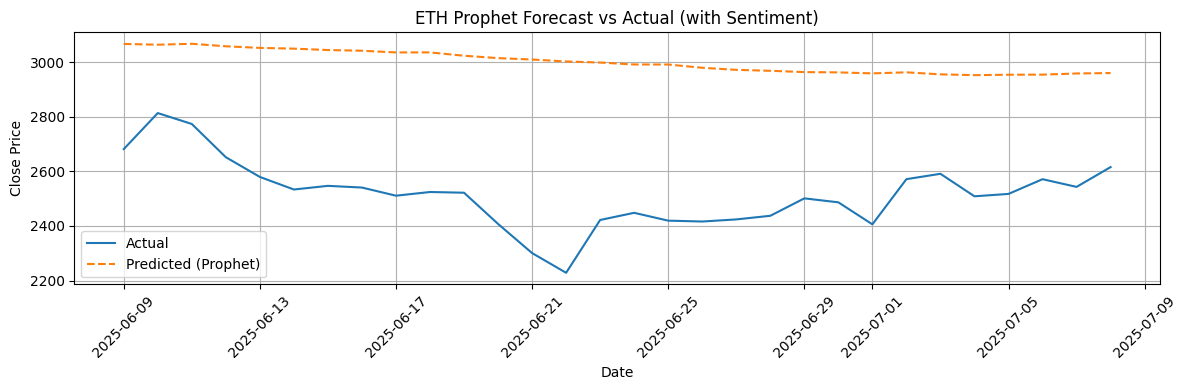

In [2]:
# Load BTC data (with sentiment already merged)
df_eth = pd.read_csv("ETH_final.csv", parse_dates=['timestamp'])

# Rename for Prophet format
df_prophet = df_eth[['timestamp', 'close', 'sentiment']].rename(columns={
    'timestamp': 'ds',
    'close': 'y'
})

# Last 30 days = test, rest = train
train_df = df_prophet[:-30]
test_df = df_prophet[-30:]

# Initialize model and add sentiment as external regressor
model = Prophet(daily_seasonality=True)
model.add_regressor('sentiment')

# Fit on training data
model.fit(train_df)

# Create future dataframe (same length as test set)
future = model.make_future_dataframe(periods=30)

# Add sentiment for both train and test periods
future['sentiment'] = pd.concat([train_df['sentiment'], test_df['sentiment']], ignore_index=True)

# Predict
forecast = model.predict(future)

# Extract prediction for test period
predicted = forecast.set_index('ds').loc[test_df['ds']]
actual = test_df.set_index('ds')['y']

# Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted['yhat']))
mae = mean_absolute_error(actual, predicted['yhat'])
mape = np.mean(np.abs((actual - predicted['yhat']) / actual)) * 100
r2 = r2_score(actual, predicted['yhat'])

# Print metrics
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(actual.index, actual, label='Actual')
plt.plot(actual.index, predicted['yhat'], label='Predicted (Prophet)', linestyle='--')
plt.title(f"ETH Prophet Forecast vs Actual (with Sentiment)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## 5. Prophet on BNB (without news sentiment):

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/z8rwanmb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/ifv2yhr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15151', 'data', 'file=/tmp/tmpl2c53jhc/z8rwanmb.json', 'init=/tmp/tmpl2c53jhc/ifv2yhr1.json', 'output', 'file=/tmp/tmpl2c53jhc/prophet_model2ux8ihhw/prophet_model-20250712121225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🟣 Prophet R² Score: -49.3622
📉 RMSE: 81.32
📉 MAE: 80.48
📉 MAPE: 12.39%


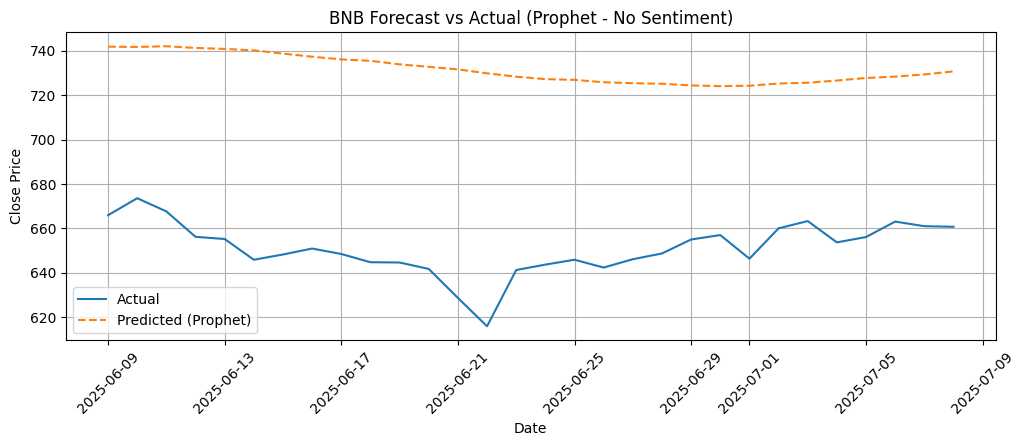

In [4]:
# Load BTC data
df_bnb = pd.read_csv("BNB_final.csv", parse_dates=['timestamp'])

# Prepare for Prophet format
df_prophet = df_bnb[['timestamp', 'close']].rename(columns={
    'timestamp': 'ds',
    'close': 'y'
})
train_df = df_prophet[:-30]  # All rows except last 30
test_df = df_prophet[-30:]  # Last 30 rows
# Initialize model
model = Prophet(daily_seasonality=True)

# Fit model on training data
model.fit(train_df)
# Create future dataframe (30 days ahead)
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Extract only predictions for the test period
predicted = forecast.set_index('ds').loc[test_df['ds']]
actual = test_df.set_index('ds')['y']

# Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted['yhat']))
mae = mean_absolute_error(actual, predicted['yhat'])
mape = np.mean(np.abs((actual - predicted['yhat']) / actual)) * 100

# Results
r2_prophet = r2_score(actual, predicted['yhat'])  # where actual and predicted were used in Prophet
print(f"🟣 Prophet R² Score: {r2_prophet:.4f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
plt.figure(figsize=(12, 4))
plt.plot(actual.index, actual, label='Actual')
plt.plot(actual.index, predicted['yhat'], label='Predicted (Prophet)', linestyle='--')
plt.title("BNB Forecast vs Actual (Prophet - No Sentiment)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


## 6. Prophet on BNB (with news sentiment):

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/nx01qo79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl2c53jhc/2inmg6ci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28403', 'data', 'file=/tmp/tmpl2c53jhc/nx01qo79.json', 'init=/tmp/tmpl2c53jhc/2inmg6ci.json', 'output', 'file=/tmp/tmpl2c53jhc/prophet_modelkiswjubc/prophet_model-20250712121404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📉 RMSE: 80.78
📉 MAE: 79.92
📉 MAPE: 12.31%
✅ R² Score: -48.6910


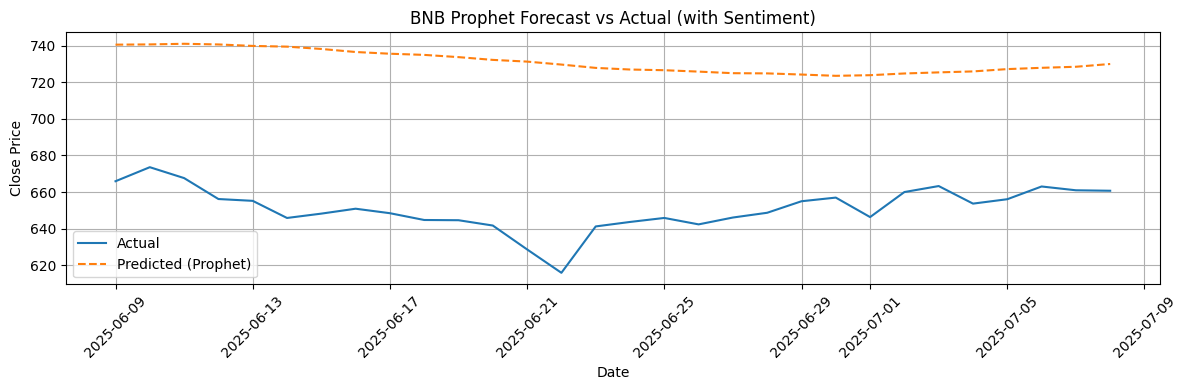

In [6]:
# Load BTC data (with sentiment already merged)
df_bnb = pd.read_csv("BNB_final.csv", parse_dates=['timestamp'])

# Rename for Prophet format
df_prophet = df_bnb[['timestamp', 'close', 'sentiment']].rename(columns={
    'timestamp': 'ds',
    'close': 'y'
})

# Last 30 days = test, rest = train
train_df = df_prophet[:-30]
test_df = df_prophet[-30:]

# Initialize model and add sentiment as external regressor
model = Prophet(daily_seasonality=True)
model.add_regressor('sentiment')

# Fit on training data
model.fit(train_df)

# Create future dataframe (same length as test set)
future = model.make_future_dataframe(periods=30)

# Add sentiment for both train and test periods
future['sentiment'] = pd.concat([train_df['sentiment'], test_df['sentiment']], ignore_index=True)

# Predict
forecast = model.predict(future)

# Extract prediction for test period
predicted = forecast.set_index('ds').loc[test_df['ds']]
actual = test_df.set_index('ds')['y']

# Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted['yhat']))
mae = mean_absolute_error(actual, predicted['yhat'])
mape = np.mean(np.abs((actual - predicted['yhat']) / actual)) * 100
r2 = r2_score(actual, predicted['yhat'])

# Print metrics
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(actual.index, actual, label='Actual')
plt.plot(actual.index, predicted['yhat'], label='Predicted (Prophet)', linestyle='--')
plt.title(f"BNB Prophet Forecast vs Actual (with Sentiment)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# LSTM Models

## 1. LSTM with BTC (without sentiment):

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4502e-04 - val_loss: 0.0011
Epoch 3/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3807e-04 - val_loss: 0.0011
Epoch 4/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.7173e-05 - val_loss: 0.0011
Epoch 5/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.6607e-05 - val_loss: 5.7443e-04
Epoch 6/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.7684e-05 - val_loss: 6.0319e-04
Epoch 7/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.1287e-05 - val_loss: 8.9708e-04
Epoch 8/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.9059e-05 - val_loss: 4.4641e-04
Epoch 9/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.5430e-05 - val_loss: 6.3101e-04
Epoch 10/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.5747e-05 - val_loss: 8.7126e-04
Epoch 11/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.1580e-05 - val_l

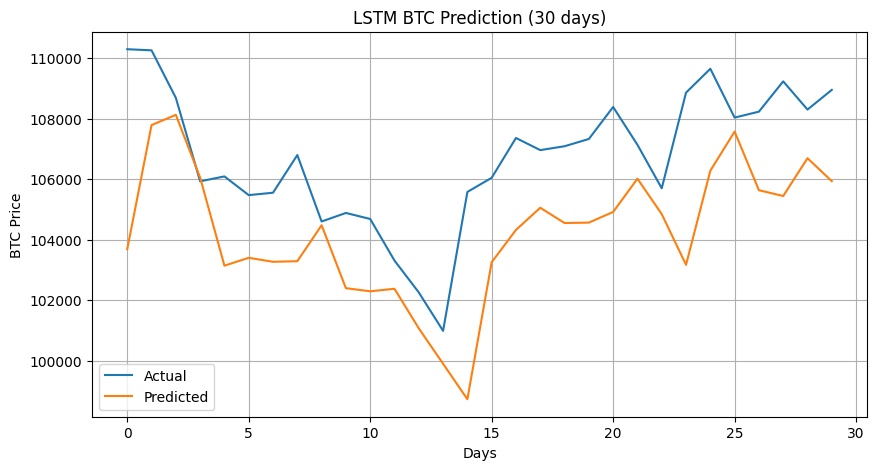

📉 RMSE: 2990.62
📉 MAE: 2487.72
📉 MAPE: 2.32%
✅ R² Score: -0.8234


In [19]:

# Load dataset
df = pd.read_csv("BTC_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Use only 'close' price
data = df[['close']].copy()

# Normalize data (LSTM needs scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Reshape input for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split (last 30 days as test)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("LSTM BTC Prediction (30 days)")
plt.xlabel("Days")
plt.ylabel("BTC Price")
plt.legend()
plt.grid()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")


## 2. LSTM on BTC (with news sentiment):

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0028 - val_loss: 9.5340e-04
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3041e-04 - val_loss: 9.1533e-04
Epoch 3/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1176e-04 - val_loss: 0.0018
Epoch 4/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.8474e-05 - val_loss: 9.7449e-04
Epoch 5/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.4865e-05 - val_loss: 5.6158e-04
Epoch 6/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.5664e-05 - val_loss: 4.9484e-04
Epoch 7/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.4219e-05 - val_loss: 5.5268e-04
Epoch 8/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.4897e-05 - val_loss: 7.4227e-04
Epoch 9/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.6657e-05 - val_loss: 6.1746e-04
Epoch 10/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.4994e-05 - val_loss: 4.5031e-04
Epoch 11/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.0544

/tmp/ipython-input-18-2768073027.py:62: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


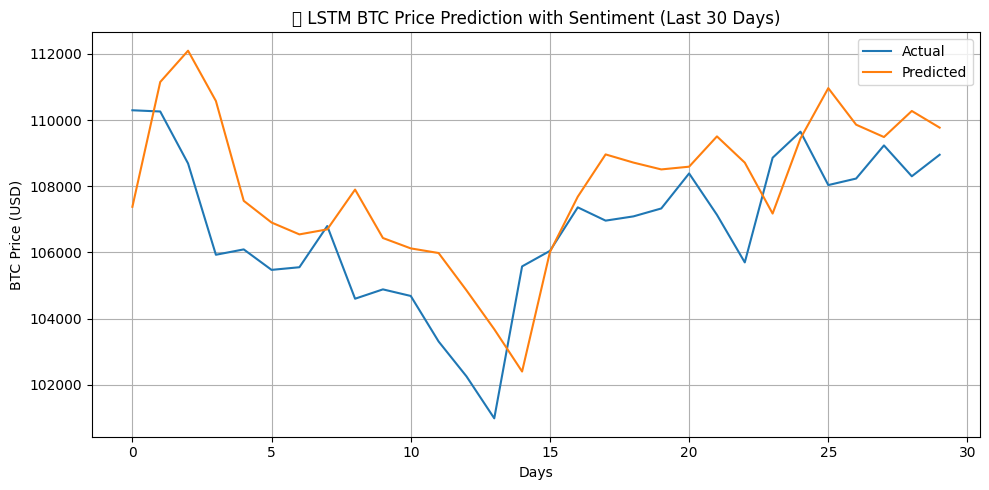

📉 RMSE: 2128.14
📉 MAE: 1783.99
📉 MAPE: 1.68%
✅ R² Score: 0.0767


In [18]:
df = pd.read_csv("BTC_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Keep 'close' and 'sentiment' columns
data = df[['close', 'sentiment']].copy()

# Scale 'close' price only
price_scaler = MinMaxScaler()
data['scaled_close'] = price_scaler.fit_transform(data[['close']])

# Convert to numpy array with two features: [scaled_close, sentiment]
scaled_data = data[['scaled_close', 'sentiment']].values

# Create sequences (30 timesteps, 2 features)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])  # Shape (30, 2)
        y.append(data[i, 0])             # Predict next close (scaled)
    return np.array(X), np.array(y)

# Generate sequences
window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Train-test split (last 30 samples for test)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Build LSTM model (2 features per timestep)
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window_size, 2)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = price_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = price_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("📈 LSTM BTC Price Prediction with Sentiment (Last 30 Days)")
plt.xlabel("Days")
plt.ylabel("BTC Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print scores
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")


### 3. LSTM on BTC (with sentiment, volume and marketcap):

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6191e-04 - val_loss: 9.9918e-04
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3174e-04 - val_loss: 0.0013
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0336e-04 - val_loss: 5.8774e-04
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.8326e-05 - val_loss: 5.3962e-04
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7258e-05 - val_loss: 0.0010
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3739e-05 - val_loss: 4.8390e-04
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.9468e-05 - val_loss: 9.3771e-04
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3800e-05 - val_loss: 5.6550e-04
Epoch 10/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3075e-05 - val_loss: 6.7413e-04
Epoch 11/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3911e-05 - v

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


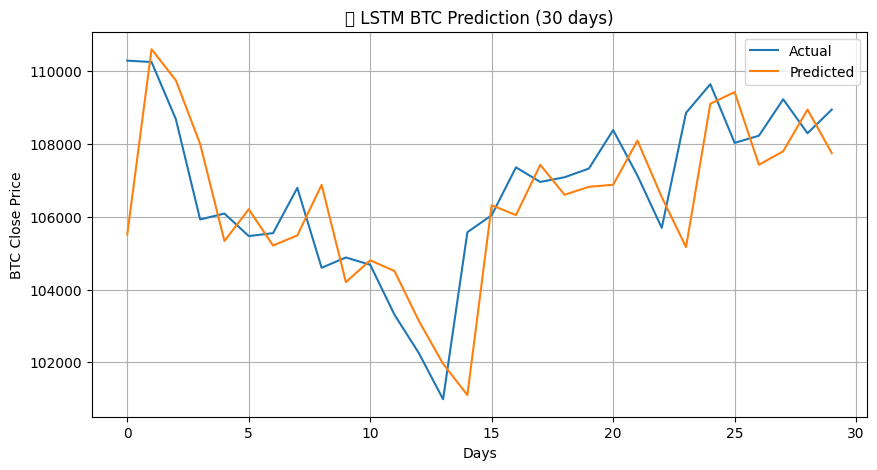

📉 RMSE: 1702.92
📉 MAE: 1269.15
📉 MAPE: 1.19%
✅ R² Score: 0.4088


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("BTC_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Use multiple features
features = ['close', 'sentiment', 'volume', 'marketCap']
data = df[features].copy()

# Scale all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :])  # All features
        y.append(data[i, 0])  # Only 'close' as target
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Train/test split (last 30 days as test)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(window_size, len(features))),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Predict
y_pred = model.predict(X_test)

# Inverse transform only 'close' column
close_scaler = MinMaxScaler()
close_scaler.fit(df[['close']])
y_pred_inv = close_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("📈 LSTM BTC Prediction (30 days)")
plt.xlabel("Days")
plt.ylabel("BTC Close Price")
plt.legend()
plt.grid()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")


In [ ]:
model.save("BTC_LSTM_multivariate.h5")

## 4. LSTM on ETH (without sentiment):

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0163 - val_loss: 0.0016
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.8473e-04 - val_loss: 0.0013
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5381e-04 - val_loss: 0.0012
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.2826e-04 - val_loss: 0.0010
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2821e-04 - val_loss: 0.0011
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2733e-04 - val_loss: 0.0010
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9602e-04 - val_loss: 0.0013
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0842e-04 - val_loss: 7.9607e-04
Epoch 9/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0421e-04 - val_loss: 7.5560e-04
Epoch 10/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1798e-04 - val_loss: 6.9679e-04
Epoch 11/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1165e-04 - val_loss: 7.7867e

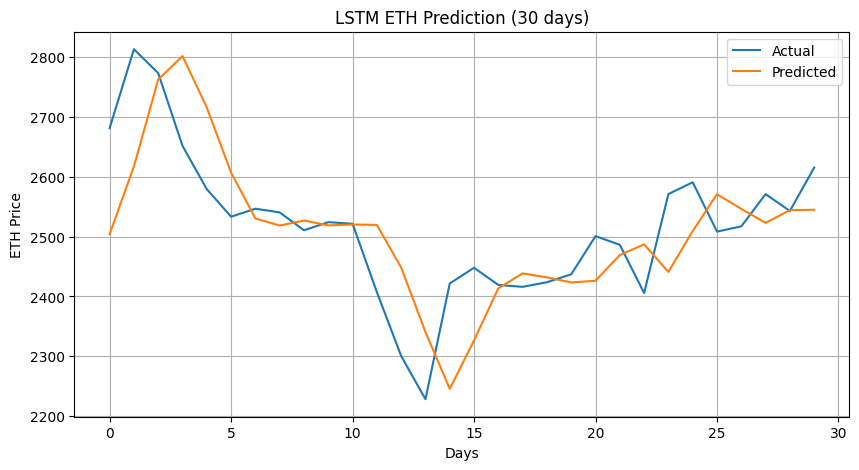

📉 RMSE: 93.00
📉 MAE: 70.73
📉 MAPE: 2.81%
✅ R² Score: 0.3979


In [20]:

# Load dataset
df = pd.read_csv("ETH_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Use only 'close' price
data = df[['close']].copy()

# Normalize data (LSTM needs scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Reshape input for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split (last 30 days as test)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("LSTM ETH Prediction (30 days)")
plt.xlabel("Days")
plt.ylabel("ETH Price")
plt.legend()
plt.grid()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")


## 5. LSTM on ETH (with news sentiment):

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0201 - val_loss: 0.0016
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.0052e-04 - val_loss: 0.0016
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.2732e-04 - val_loss: 0.0011
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0919e-04 - val_loss: 0.0011
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6551e-04 - val_loss: 9.3067e-04
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5612e-04 - val_loss: 8.8438e-04
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9586e-04 - val_loss: 9.0530e-04
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.0086e-04 - val_loss: 8.5930e-04
Epoch 9/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.2995e-04 - val_loss: 7.7623e-04
Epoch 10/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.4515e-04 - val_loss: 8.1147e-04
Epoch 11/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2716e-04 - val_l

/tmp/ipython-input-21-2299036699.py:62: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


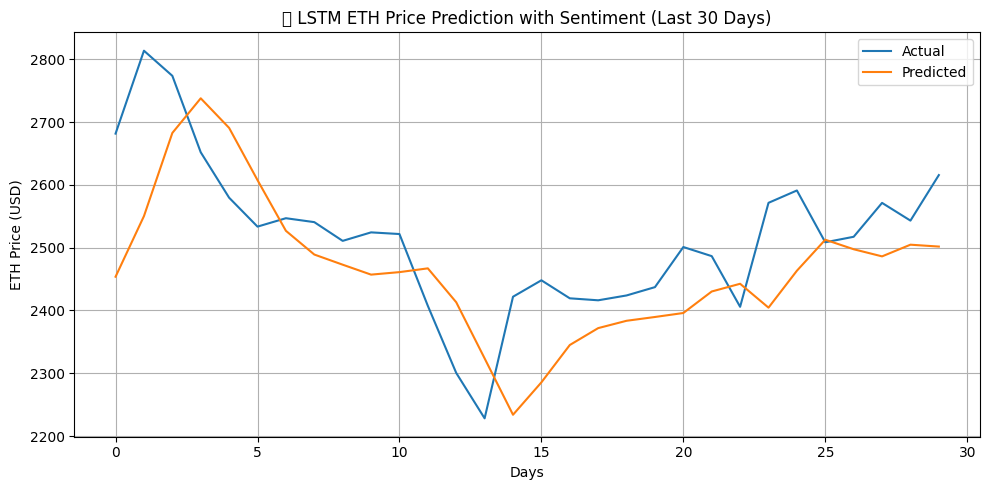

📉 RMSE: 107.65
📉 MAE: 88.97
📉 MAPE: 3.50%
✅ R² Score: 0.1933


In [21]:
df = pd.read_csv("ETH_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Keep 'close' and 'sentiment' columns
data = df[['close', 'sentiment']].copy()

# Scale 'close' price only
price_scaler = MinMaxScaler()
data['scaled_close'] = price_scaler.fit_transform(data[['close']])

# Convert to numpy array with two features: [scaled_close, sentiment]
scaled_data = data[['scaled_close', 'sentiment']].values

# Create sequences (30 timesteps, 2 features)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])  # Shape (30, 2)
        y.append(data[i, 0])             # Predict next close (scaled)
    return np.array(X), np.array(y)

# Generate sequences
window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Train-test split (last 30 samples for test)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Build LSTM model (2 features per timestep)
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window_size, 2)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = price_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = price_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("📈 LSTM ETH Price Prediction with Sentiment (Last 30 Days)")
plt.xlabel("Days")
plt.ylabel("ETH Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Print scores
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")


## LSTM on ETH (with sentiment, volume and marketkap):

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0149 - val_loss: 0.0016
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5597e-04 - val_loss: 0.0014
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.8044e-04 - val_loss: 0.0012
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1091e-04 - val_loss: 9.7295e-04
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4428e-04 - val_loss: 9.2718e-04
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0863e-04 - val_loss: 0.0017
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.2856e-04 - val_loss: 7.9870e-04
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.9355e-04 - val_loss: 0.0012
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9793e-04 - val_loss: 7.5654e-04
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8420e-04 - val_loss: 7.1557e-04
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3012e-04 - val_loss:

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


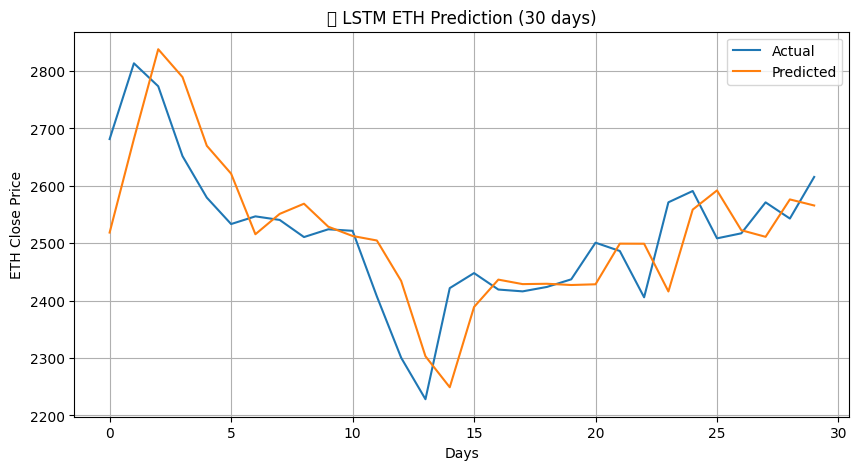

📉 RMSE: 83.25
📉 MAE: 65.67
📉 MAPE: 2.60%
✅ R² Score: 0.5176


In [22]:

# Load dataset
df = pd.read_csv("ETH_final.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Use multiple features
features = ['close', 'sentiment', 'volume', 'marketCap']
data = df[features].copy()

# Scale all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :])  # All features
        y.append(data[i, 0])  # Only 'close' as target
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Train/test split (last 30 days as test)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(window_size, len(features))),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Predict
y_pred = model.predict(X_test)

# Inverse transform only 'close' column
close_scaler = MinMaxScaler()
close_scaler.fit(df[['close']])
y_pred_inv = close_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("📈 LSTM ETH Prediction (30 days)")
plt.xlabel("Days")
plt.ylabel("ETH Close Price")
plt.legend()
plt.grid()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MAPE: {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f}")
